In [15]:
from result_funcs import *
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family']='Times New Roman, SimHei'
matplotlib.rcParams['font.size']=11
import seaborn as sns
import scienceplots
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp
import os
import matplotlib.pyplot as plt
import seaborn as sns
current_dir = os.path.dirname(os.path.realpath("result_analysis.ipynb")) + "/"
sizes = ['20*5', '20*10', '20*20', '50*5', '50*10', '50*20', '100*5', '100*10', '100*20', '200*10', '200*20', '500*20']
print(current_dir)

D:\Projects\HFSP\HFSP/


# Datas

## Rules and heuristics

In [16]:
table_rs = np.load(current_dir+"results/ta_newjob/low/heuristics/120_rs.npy")
table_spt = np.load(current_dir+"results/ta_newjob/low/heuristics/120_spt.npy")
table_lpt = np.load(current_dir+"results/ta_newjob/low/heuristics/120_lpt.npy")
table_ritm = np.load(current_dir+"results/ta_newjob/low/heuristics/120_ritm.npy")
table_neh = np.load(current_dir+"results/ta_newjob/low/heuristics/120_neh.npy")
table_neh1 = np.load(current_dir+"results/ta_newjob/low/heuristics/120_neh1.npy")
table_nehnm = np.load(current_dir+"results/ta_newjob/low/heuristics/120_nehnm.npy")
table_nehnm1 = np.load(current_dir+"results/ta_newjob/low/heuristics/120_nehnm1.npy")
table_nehkk = np.load(current_dir+"results/ta_newjob/low/heuristics/120_nehkk.npy")
table_random = np.load(current_dir+"results/ta_newjob/low/heuristics/120_random.npy")

df_rs = create_df(table_rs, sizes, 'RS', 120)
df_spt = create_df(table_spt, sizes, 'SPT', 120)
df_lpt = create_df(table_lpt, sizes, 'LPT', 120)
df_ritm = create_df(table_ritm, sizes, 'RITM', 120)
df_neh = create_df(table_neh, sizes, 'NEH', 120)
df_neh1 = create_df(table_neh1, sizes, 'NEH1', 120)
df_nehnm = create_df(table_nehnm, sizes, 'NEHNM', 120)
df_nehnm1 = create_df(table_nehnm1, sizes, 'NEHNM1', 120)
df_nehkk = create_df(table_nehkk, sizes, 'NEHKK1', 120)
df_random = create_df(table_random, sizes, 'RANDOM', 120)
df_rules = merge_df([df_rs, df_spt, df_lpt, df_ritm, df_neh, df_neh1, df_nehnm, df_nehnm1, df_nehkk, df_random])
ruleslist = df_rules['methods'].unique().tolist()

## FTA

In [17]:
table120_fta_time375 = np.load(current_dir+"results/ta_newjob/low/meta/120_FTA_time3.75.npy")
table120_fta_time75 = np.load(current_dir+"results/ta_newjob/low/meta/120_FTA_time7.5.npy")

table94_ig_t375 = np.load(current_dir+"results/ta_newjob/low/meta/94_IG_time3.75.npy")
for i in range(90,100):
    table94_ig_t375[i] = table94_ig_t375[110]

df_fta375 = create_df(table120_fta_time375, sizes, 'FTA', 120)
df_fta75 = create_df(table120_fta_time75, sizes, 'FTA', 120)
df90_ig375 = create_df(table94_ig_t375, sizes, 'IG', 120)

## MCTS

In [18]:
table120_ucttime375_c2s50 = np.load(current_dir+"results/ta_newjob/low/uct/meta_time/120_choose2_scalar50_time3.75.npy")
table120_ucttime75_c2s50 = np.load(current_dir+"results/ta_newjob/low/uct/meta_time/120_choose2_scalar50_time7.5.npy")

df_uct375 = create_df(table120_ucttime375_c2s50, sizes, 'MCTS', 120)
df_uct75 = create_df(table120_ucttime75_c2s50, sizes, 'MCTS', 120)

## DPW

In [19]:
table120_dpw242_t375 = np.load(current_dir+"results/ta_newjob/low/dpw/new/120_c2_scalar50k1k2alpha20400.2_time3.75.npy")
table120_dpw242_t15 = np.load(current_dir+"results/ta_newjob/low/dpw/new/120_c2_scalar50k1k2alpha20400.2_time15.npy")
table120_dpw242_t75 = np.load(current_dir+"results/ta_newjob/low/dpw/new/120_c2_scalar50k1k2alpha20400.2_time7.5.npy")

df_dpw375 = create_df(table120_dpw242_t375, sizes, 'DPW', 120)
df_dpw75 = create_df(table120_dpw242_t75, sizes, 'DPW', 120)

# Heuristic methods

In [20]:
df_heu = merge_df([df_rs, df_spt, df_lpt, df_ritm, df_neh, df_neh1, df_nehnm, df_nehnm1, df_nehkk, df_random, df_fta375, df90_ig375])
df_heu_noig = merge_df([df_rs, df_spt, df_lpt, df_ritm, df_neh, df_neh1, df_nehnm, df_nehnm1, df_nehkk, df_random, df_fta375])

heuristics = df_heu['methods'].unique().tolist()
heuristics_noig = df_heu_noig['methods'].unique().tolist()
# rpd_heu = calculate_rpd_seed(df_heu,sizes, 0, 120)
rpd_heu_noig = calculate_rpd_seed(df_heu_noig, sizes, 0, 120)

In [21]:
print(sp.posthoc_wilcoxon(df_heu, val_col='makespans', group_col='methods'))
# print(rank_matrix_makespan(df_heu, heuristics, 0, 90))
heurank = rank_matrix_makespan(df_heu_noig, heuristics_noig, 0, 120)

                   RS            SPT  LPT           RITM            NEH  \
RS       1.000000e+00   1.467521e-67  0.0  1.008418e-124  1.927783e-188   
SPT      1.467521e-67   1.000000e+00  0.0  1.303292e-231  1.106558e-299   
LPT      0.000000e+00   0.000000e+00  1.0   0.000000e+00   0.000000e+00   
RITM    1.008418e-124  1.303292e-231  0.0   1.000000e+00   9.501524e-12   
NEH     1.927783e-188  1.106558e-299  0.0   9.501524e-12   1.000000e+00   
NEH1    7.088378e-170  9.167680e-297  0.0   2.012199e-07   1.981546e-02   
NEHNM   2.428263e-220  2.752402e-307  0.0   8.185231e-26   1.043261e-05   
NEHNM1  1.357298e-204  2.065192e-310  0.0   5.126685e-18   3.336077e-03   
NEHKK1  1.730317e-267   0.000000e+00  0.0   4.149396e-89   4.265720e-55   
RANDOM   1.453228e-01  2.696295e-100  0.0   4.684460e-94  3.101680e-162   
FTA      0.000000e+00   0.000000e+00  0.0  1.236365e-154  6.886723e-108   
IG       0.000000e+00   0.000000e+00  0.0  9.191626e-213  4.117429e-161   

                 NEH1   

In [22]:
print(np.average(heurank,axis=0))

[ 7.61020833  8.545625   10.623125    5.57229167  4.91145833  5.00375
  4.62833333  4.69479167  3.90458333  7.17020833  3.335625  ]


C:\Users\Lesli\AppData\Local\Temp\ipykernel_5532\1607473154.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f = sns.boxplot(x = 'methods', y = 'RPD', data=rpd_heu_noig, palette='Set2', linewidth=0.1, fliersize=0.5, flierprops={'marker': 'd'})
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


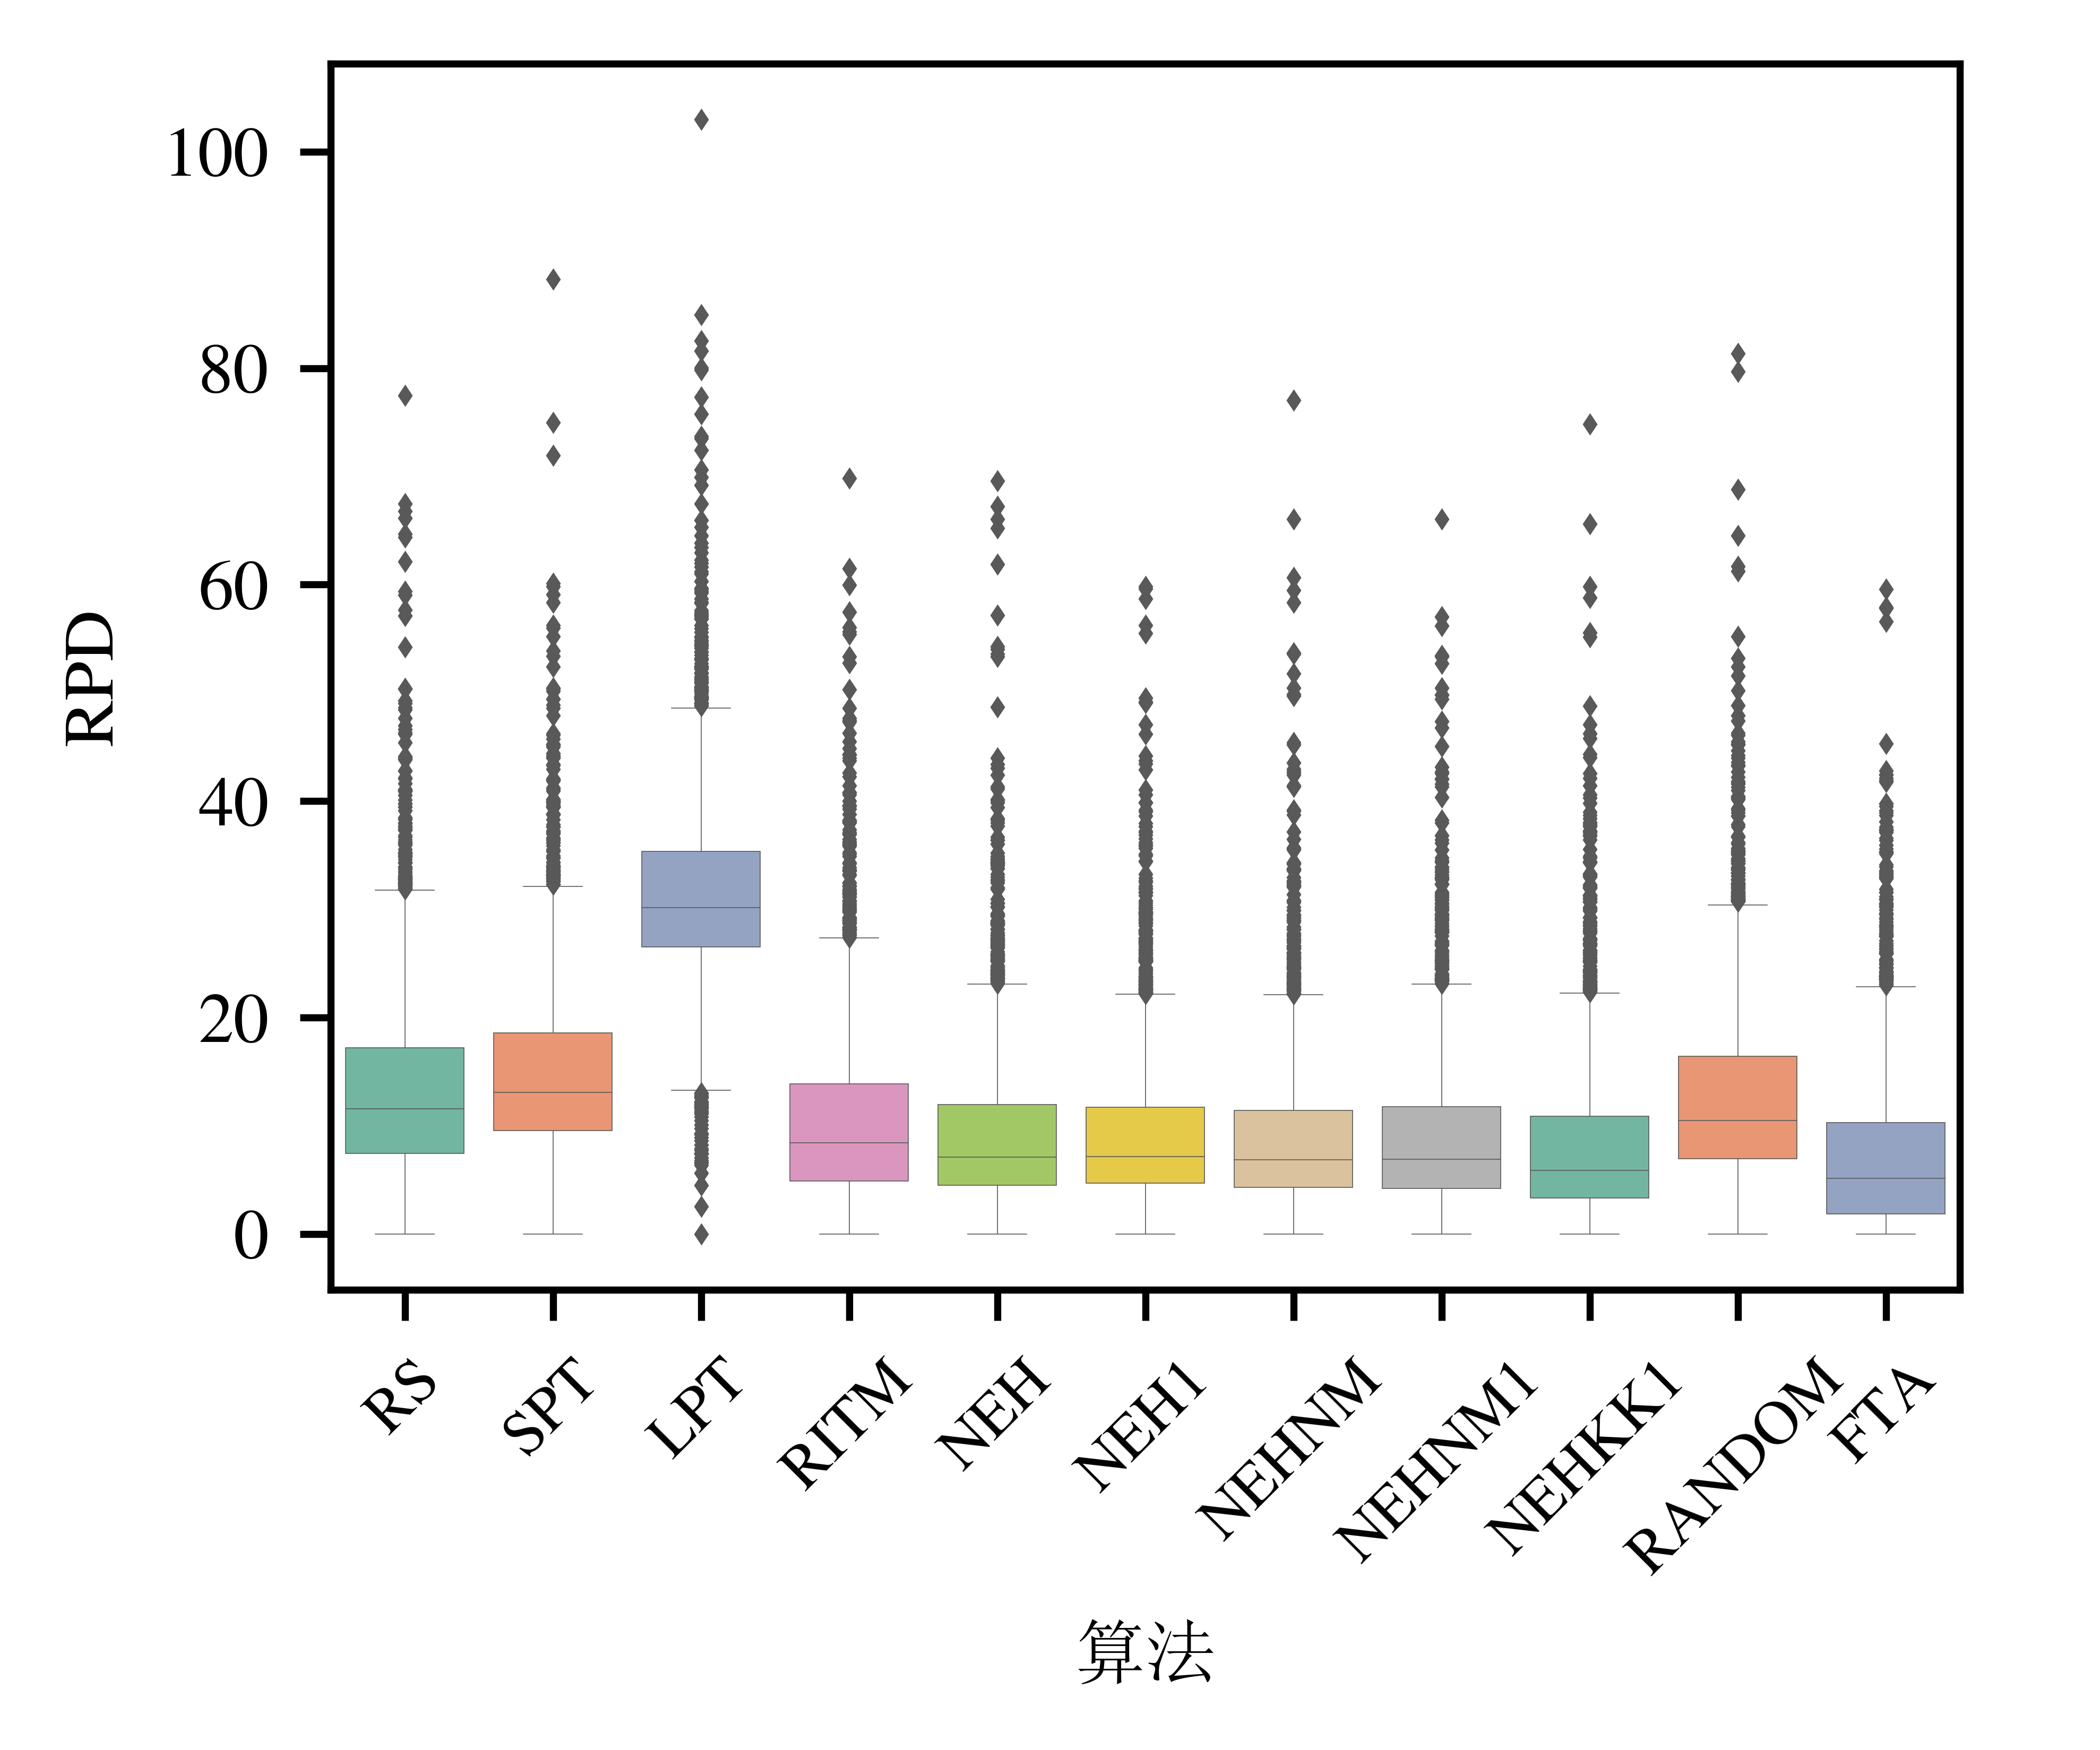

In [24]:
with plt.style.context(['ieee']):
    plt.rcParams['figure.dpi'] = 1200.0
    plt.figure()
    # f = sns.boxplot(x = 'methods', y = 'RPD', data=rpd_heu_noig, order=True palette='Set2', linewidth=0.1, fliersize=0.5, flierprops={'marker': 'd'})
    f = sns.boxplot(x = 'methods', y = 'RPD', data=rpd_heu_noig, palette='Set2', linewidth=0.1, fliersize=0.5, flierprops={'marker': 'd'})
    # f = sns.lineplot(x = 'sizes', y = 'ARPD', hue='methods', data=arpd_ig_analyse_sz, palette='Set2', linewidth=0.5, markers='o')
    f.legend(frameon = False, fontsize='small', loc=2, bbox_to_anchor=(1,1))

    plt.xlabel("算法", fontname='simsun')
    plt.xticks(rotation=45, fontsize=7)
    plt.savefig(current_dir+"/results/analysis/heu_noig.svg", dpi=1200, format='svg', bbox_inches = 'tight')
    plt.show()

## Calculation time of each method

In [26]:
rows = []
for m in heuristics_noig:
    tempdf = df_heu_noig[df_heu_noig['methods']==m]
    for sz in sizes:
        df1 = tempdf[tempdf['sizes']==sz]    
        ave = df1['times'].sum()/df1['num_of_acc'].sum()
        # print(ave)
        rows.append({'method':m, 'size':sz, 'average_time':ave})

for i in range(9):
    sz = sizes[i]
    tempdf = df90_ig375[df90_ig375['sizes']==sz]
    ave = tempdf['times'].sum()/tempdf['num_of_acc'].sum()
    rows.append({'method':'IG', 'size':sz, 'average_time':ave})

avetime = pd.DataFrame(rows)
avetime.to_excel(current_dir+'results/analysis/average_times_heuristics.xlsx', index=0)


In [27]:
heurank = rpd_rank_tests(rpd_heu_noig, 0, 120)
heurank.to_excel(current_dir+'results/analysis/heuristics_ranks.xlsx', index=0)

In [ ]:
rpd_compare_df(rpd_heu_noig, ['FTA', 'NEHKK1', 'NEHNM'], ['FTA', 'NEHKK1', 'NEHNM'], sizes)

,sizes,methods,compare,ARPD,Cohen-d,Wilcoxon
0,20*5,FTA v.s. NEHKK1,"(92, 92, 16)","(10.62, 11.32)",0.070221,3.741055e-01
1,20*10,FTA v.s. NEHKK1,"(130, 70, 0)","(12.28, 13.34)",0.097641,6.044028e-03
2,20*20,FTA v.s. NEHKK1,"(132, 67, 1)","(12.31, 14.65)",0.227178,5.552632e-05
3,50*5,FTA v.s. NEHKK1,"(75, 124, 1)","(9.25, 8.07)",0.148127,5.551161e-04
4,50*10,FTA v.s. NEHKK1,"(110, 90, 0)","(10.17, 11.08)",0.108847,5.349296e-02
5,50*20,FTA v.s. NEHKK1,"(116, 84, 0)","(9.34, 10.69)",0.206675,5.932596e-03
6,100*5,FTA v.s. NEHKK1,"(65, 135, 0)","(6.78, 5.05)",0.342220,7.413289e-11
7,100*10,FTA v.s. NEHKK1,"(107, 93, 0)","(4.70, 4.81)",0.030611,5.556317e-01
8,100*20,FTA v.s. NEHKK1,"(143, 57, 0)","(5.12, 7.10)",0.488731,4.768837e-10
9,200*10,FTA v.s. NEHKK1,"(115, 84, 1)","(3.24, 3.74)",0.181598,2.345003e-03


In [29]:
arpd_heu = calculate_arpd_sz(df_heu_noig, sizes, 0, 120)
# arpd_heu.shape[1]
heumethods = arpd_heu['methods'].unique().tolist()
df_heu_arpd = pd.DataFrame(sizes, columns=['sizes'])
for m in heumethods:
    tempdf = arpd_heu[arpd_heu['methods']==m]
    df_heu_arpd.insert(df_heu_arpd.shape[1], m, tempdf['ARPD'].tolist())
df_heu_arpd.to_excel(current_dir+"results/analysis/arpd_heuristics.xlsx", index=False)
df_heu_arpd = pd.read_excel(current_dir+"results/analysis/arpd_heuristics.xlsx", index_col=0)

C:\Users\Lesli\AppData\Local\Temp\ipykernel_5532\3208908112.py:4: UserWarning: 
The markers list has fewer values (1) than needed (11) and will cycle, which may produce an uninterpretable plot.
  f = sns.lineplot(df_heu_arpd, palette='Set2', linewidth=0.7, markers=',')


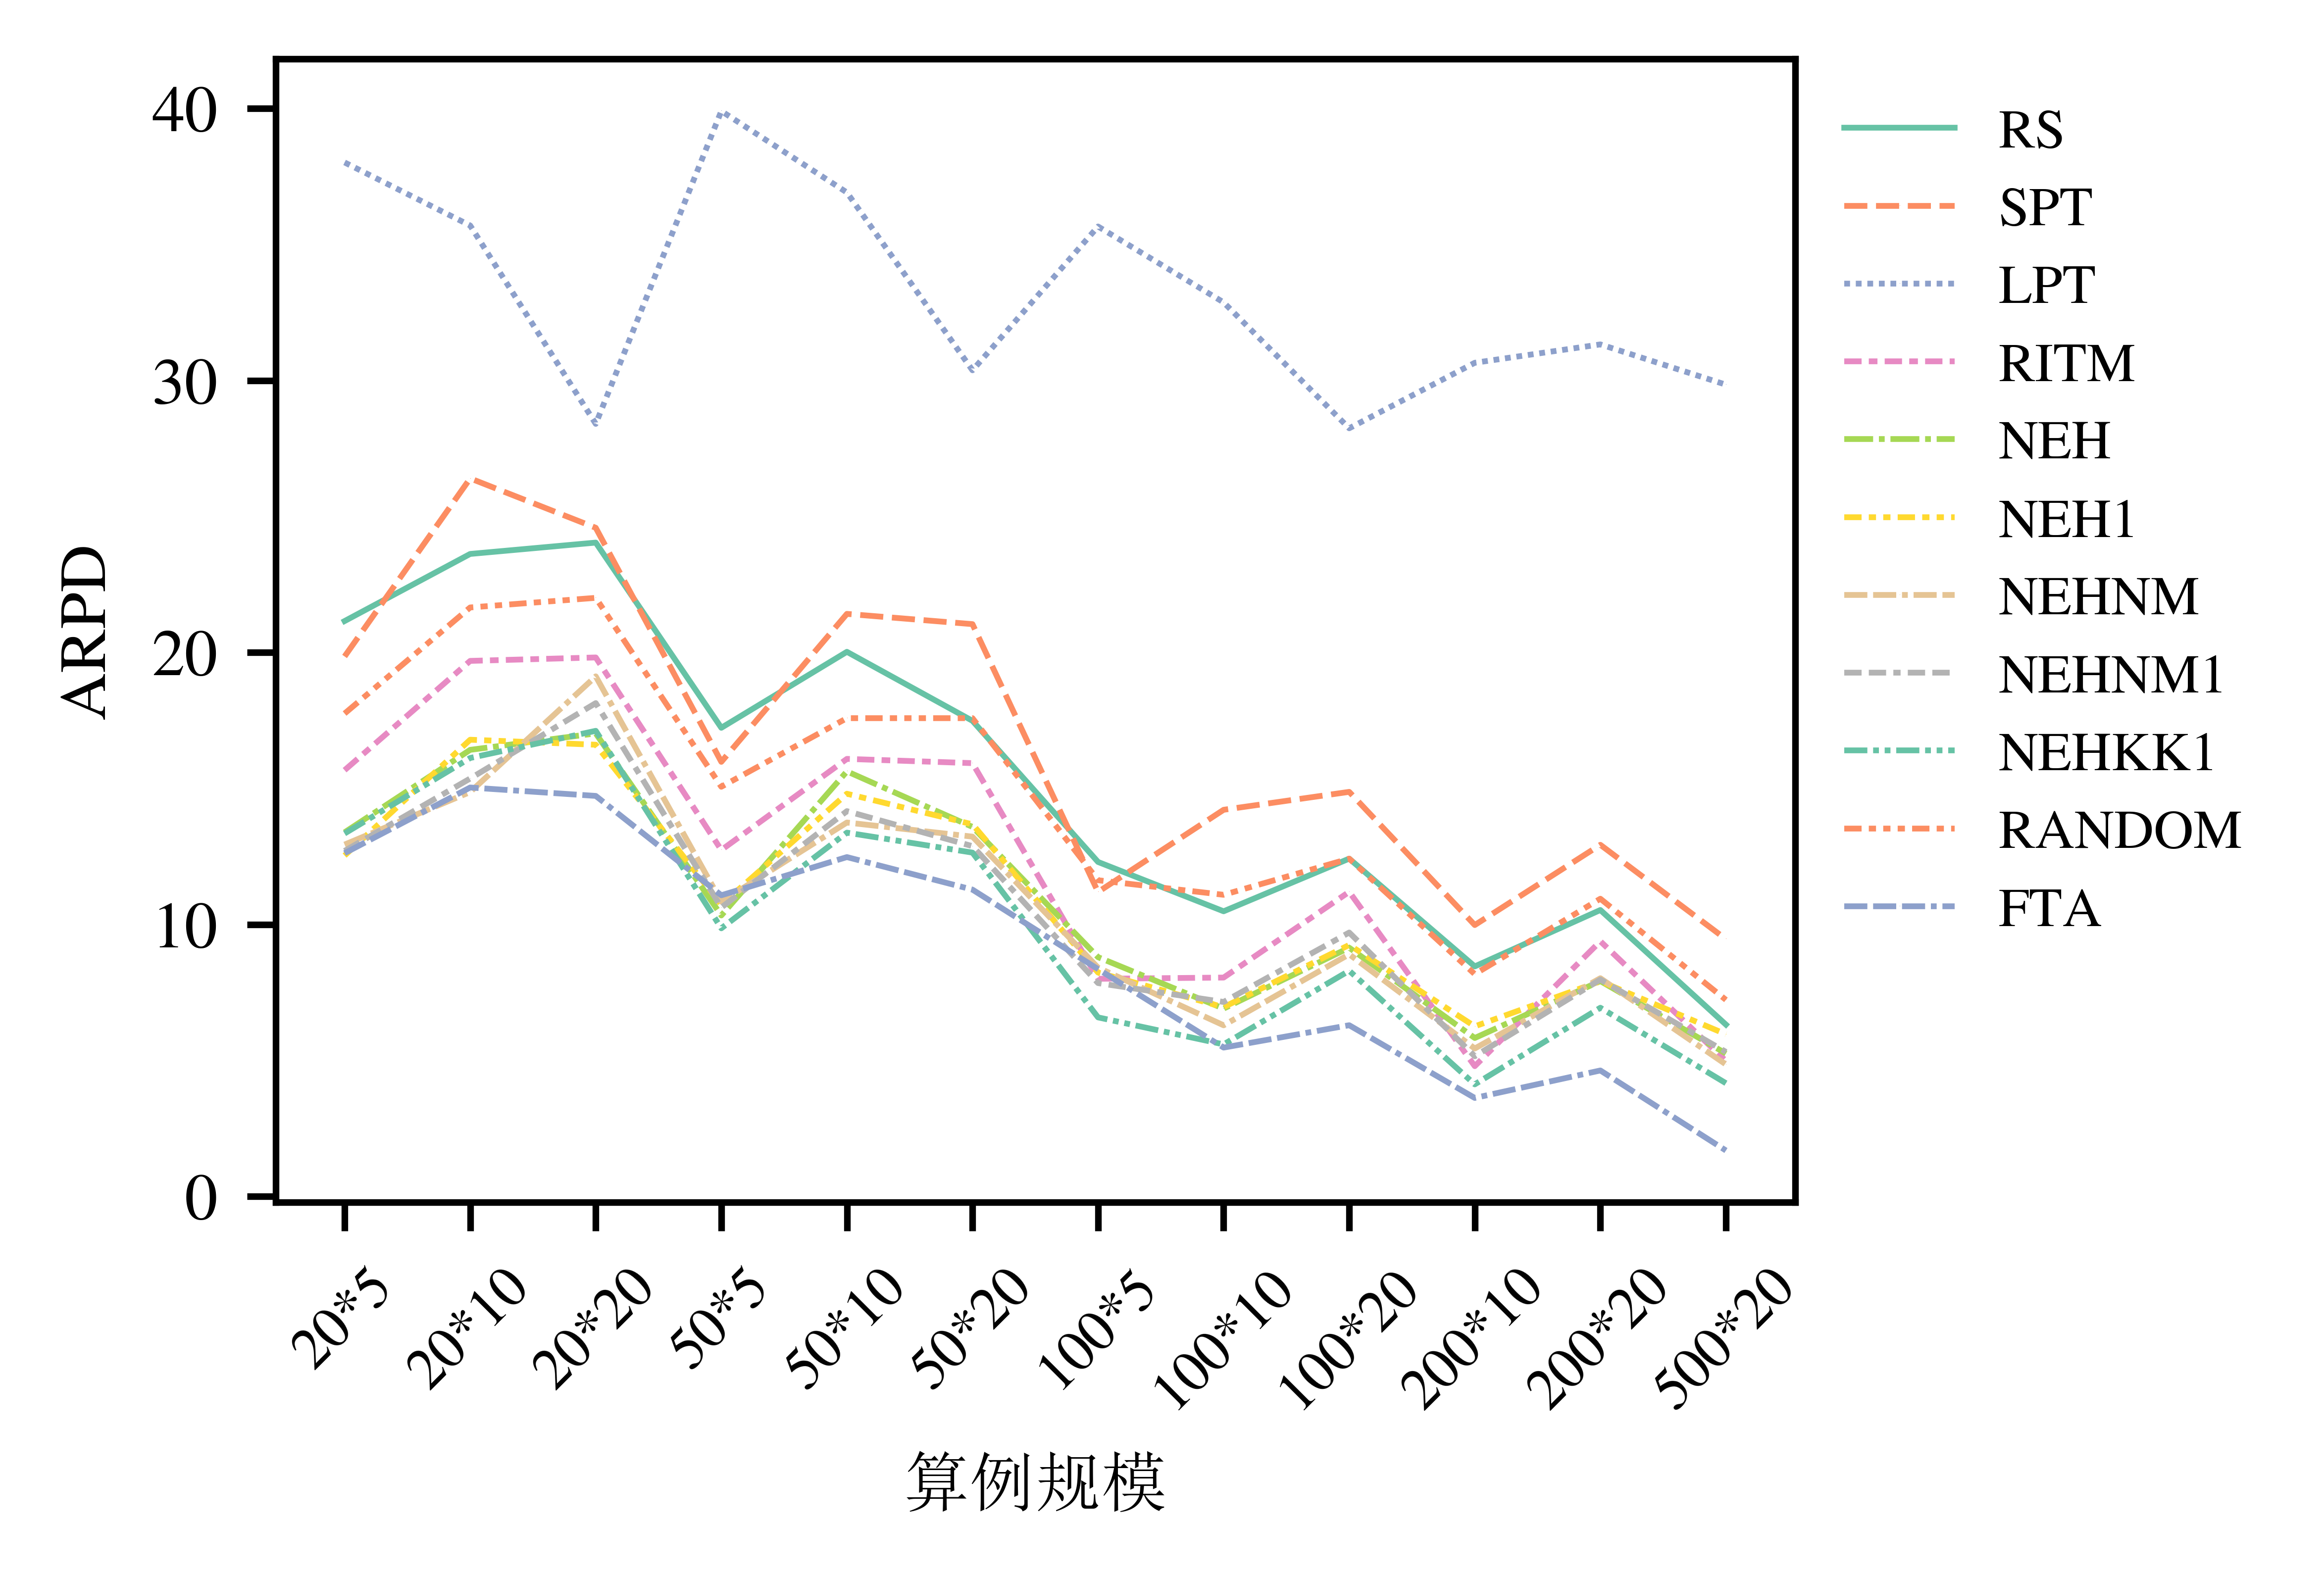

In [32]:
with plt.style.context(['ieee']):
    plt.rcParams['figure.dpi'] = 1200.0
    plt.figure()
    f = sns.lineplot(df_heu_arpd, palette='Set2', linewidth=0.7, markers=',')
    f.legend(frameon = False, fontsize='small', loc=2, bbox_to_anchor=(1,1))

    plt.xlabel("算例规模", fontname='simsun')
    plt.ylabel("ARPD")
    plt.xticks(rotation=45, fontsize=7)
    plt.savefig(current_dir+"/results/analysis/heuristics_arpd.svg", dpi=1200, format='svg', bbox_inches = 'tight')
    plt.show()

In [33]:
# 比较 FTA， NEHKK1， NEHNM 的rpd值
rpd_compare_excel(rpd_heu_noig, ['FTA','NEHKK1'], ['FTA','NEHKK1','NEHNM'], sizes, current_dir+'results/analysis/heuristics_compare.xlsx')

0

# MCTS DPW

## Time 3.75

In [34]:
df_375 = merge_df([df_rs, df_nehkk, df_fta375, df_uct375, df_dpw375])
methods375 = df_heu['methods'].unique().tolist()
rpd_375 = calculate_rpd_seed(df_375, sizes, 0, 120)

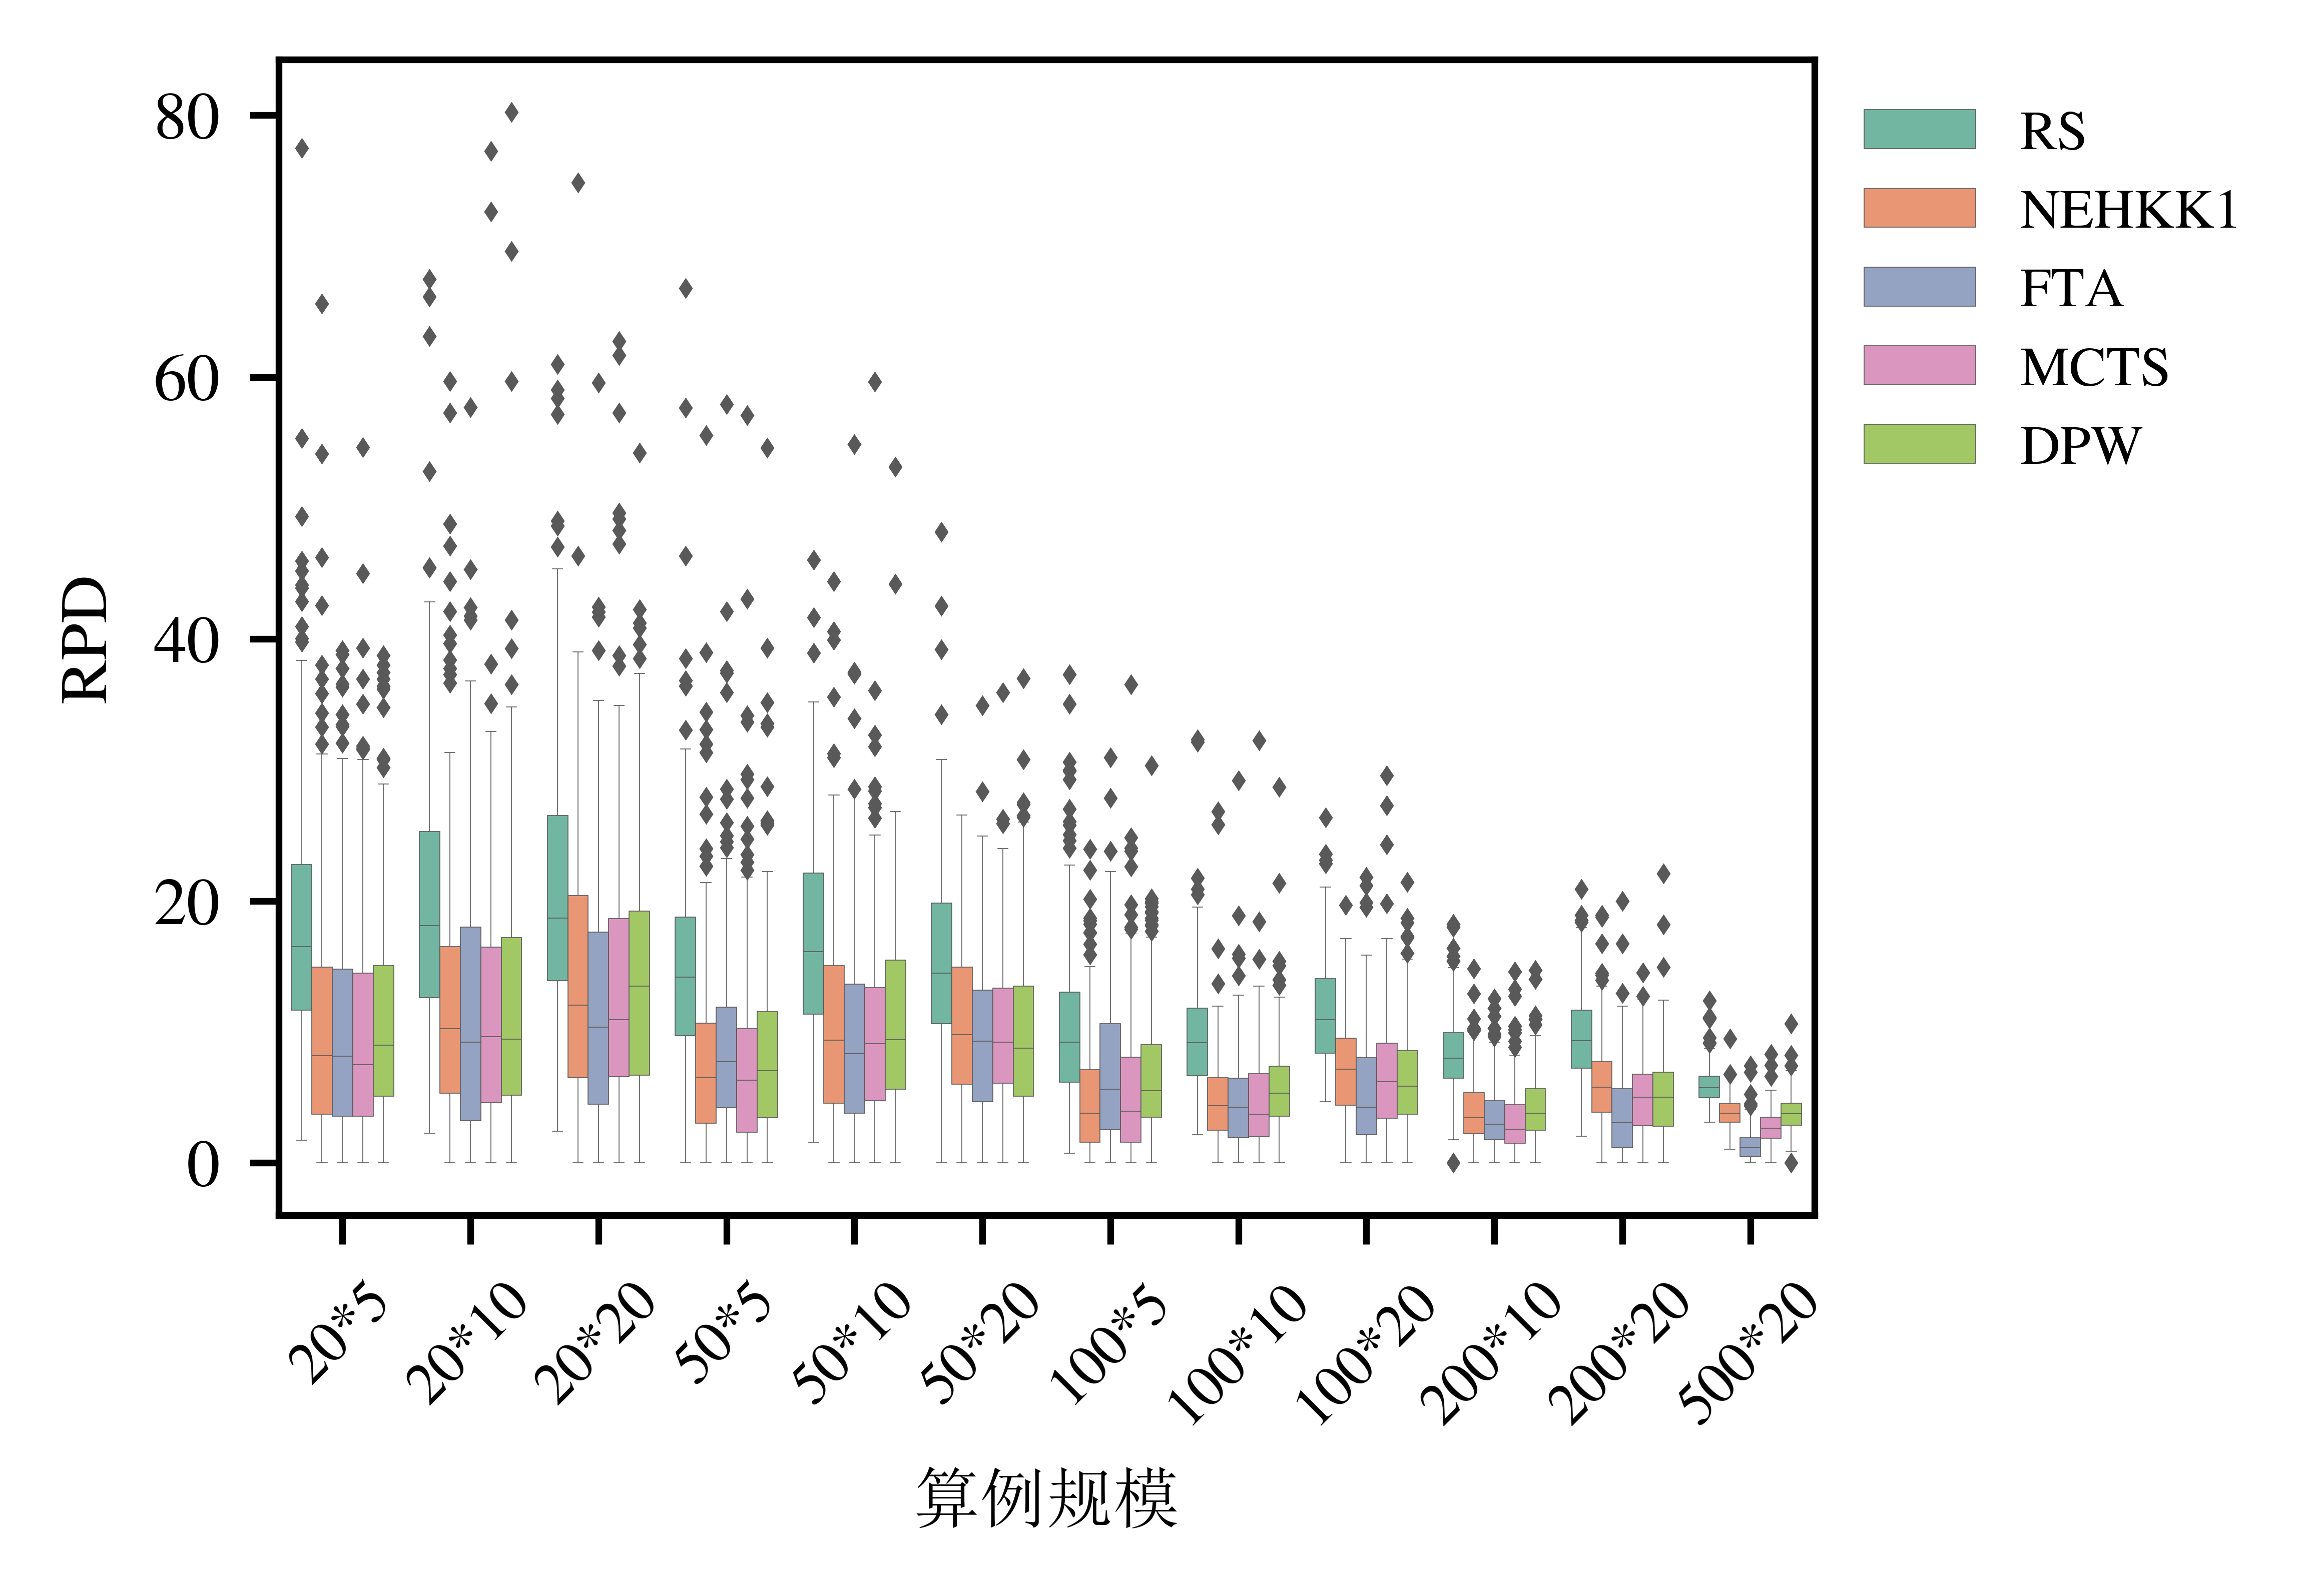

In [35]:
with plt.style.context(['ieee']):
    plt.rcParams['figure.dpi'] = 1200.0
    plt.figure()
    # f = sns.boxplot(x = 'methods', y = 'RPD', data=rpd_heu_noig, order=True palette='Set2', linewidth=0.1, fliersize=0.5, flierprops={'marker': 'd'})
    f = sns.boxplot(x = 'sizes', y = 'RPD', hue='methods', data=rpd_375, palette='Set2', linewidth=0.1, fliersize=0.5, flierprops={'marker': 'd'})
    # f = sns.lineplot(x = 'sizes', y = 'ARPD', hue='methods', data=arpd_ig_analyse_sz, palette='Set2', linewidth=0.5, markers='o')
    f.legend(frameon = False, fontsize='small', loc=2, bbox_to_anchor=(1,1))

    plt.xlabel("算例规模", fontname='simsun')
    plt.xticks(rotation=45, fontsize=7)
    plt.savefig(current_dir+"results/analysis/box375.svg", dpi=1200, format='svg', bbox_inches = 'tight')
    plt.show()

In [38]:
rpd_compare_excel(rpd_375, ['MCTS','DPW'], rpd_375['methods'].unique().tolist(), sizes, current_dir+'results/analysis/rpd375.xlsx')

0

## time 7.5


In [40]:
df_75 = merge_df([df_rs, df_nehkk, df_fta75, df_uct75, df_dpw75])
methods75 = df_heu['methods'].unique().tolist()
rpd_75 = calculate_rpd_seed(df_75, sizes, 0, 120)

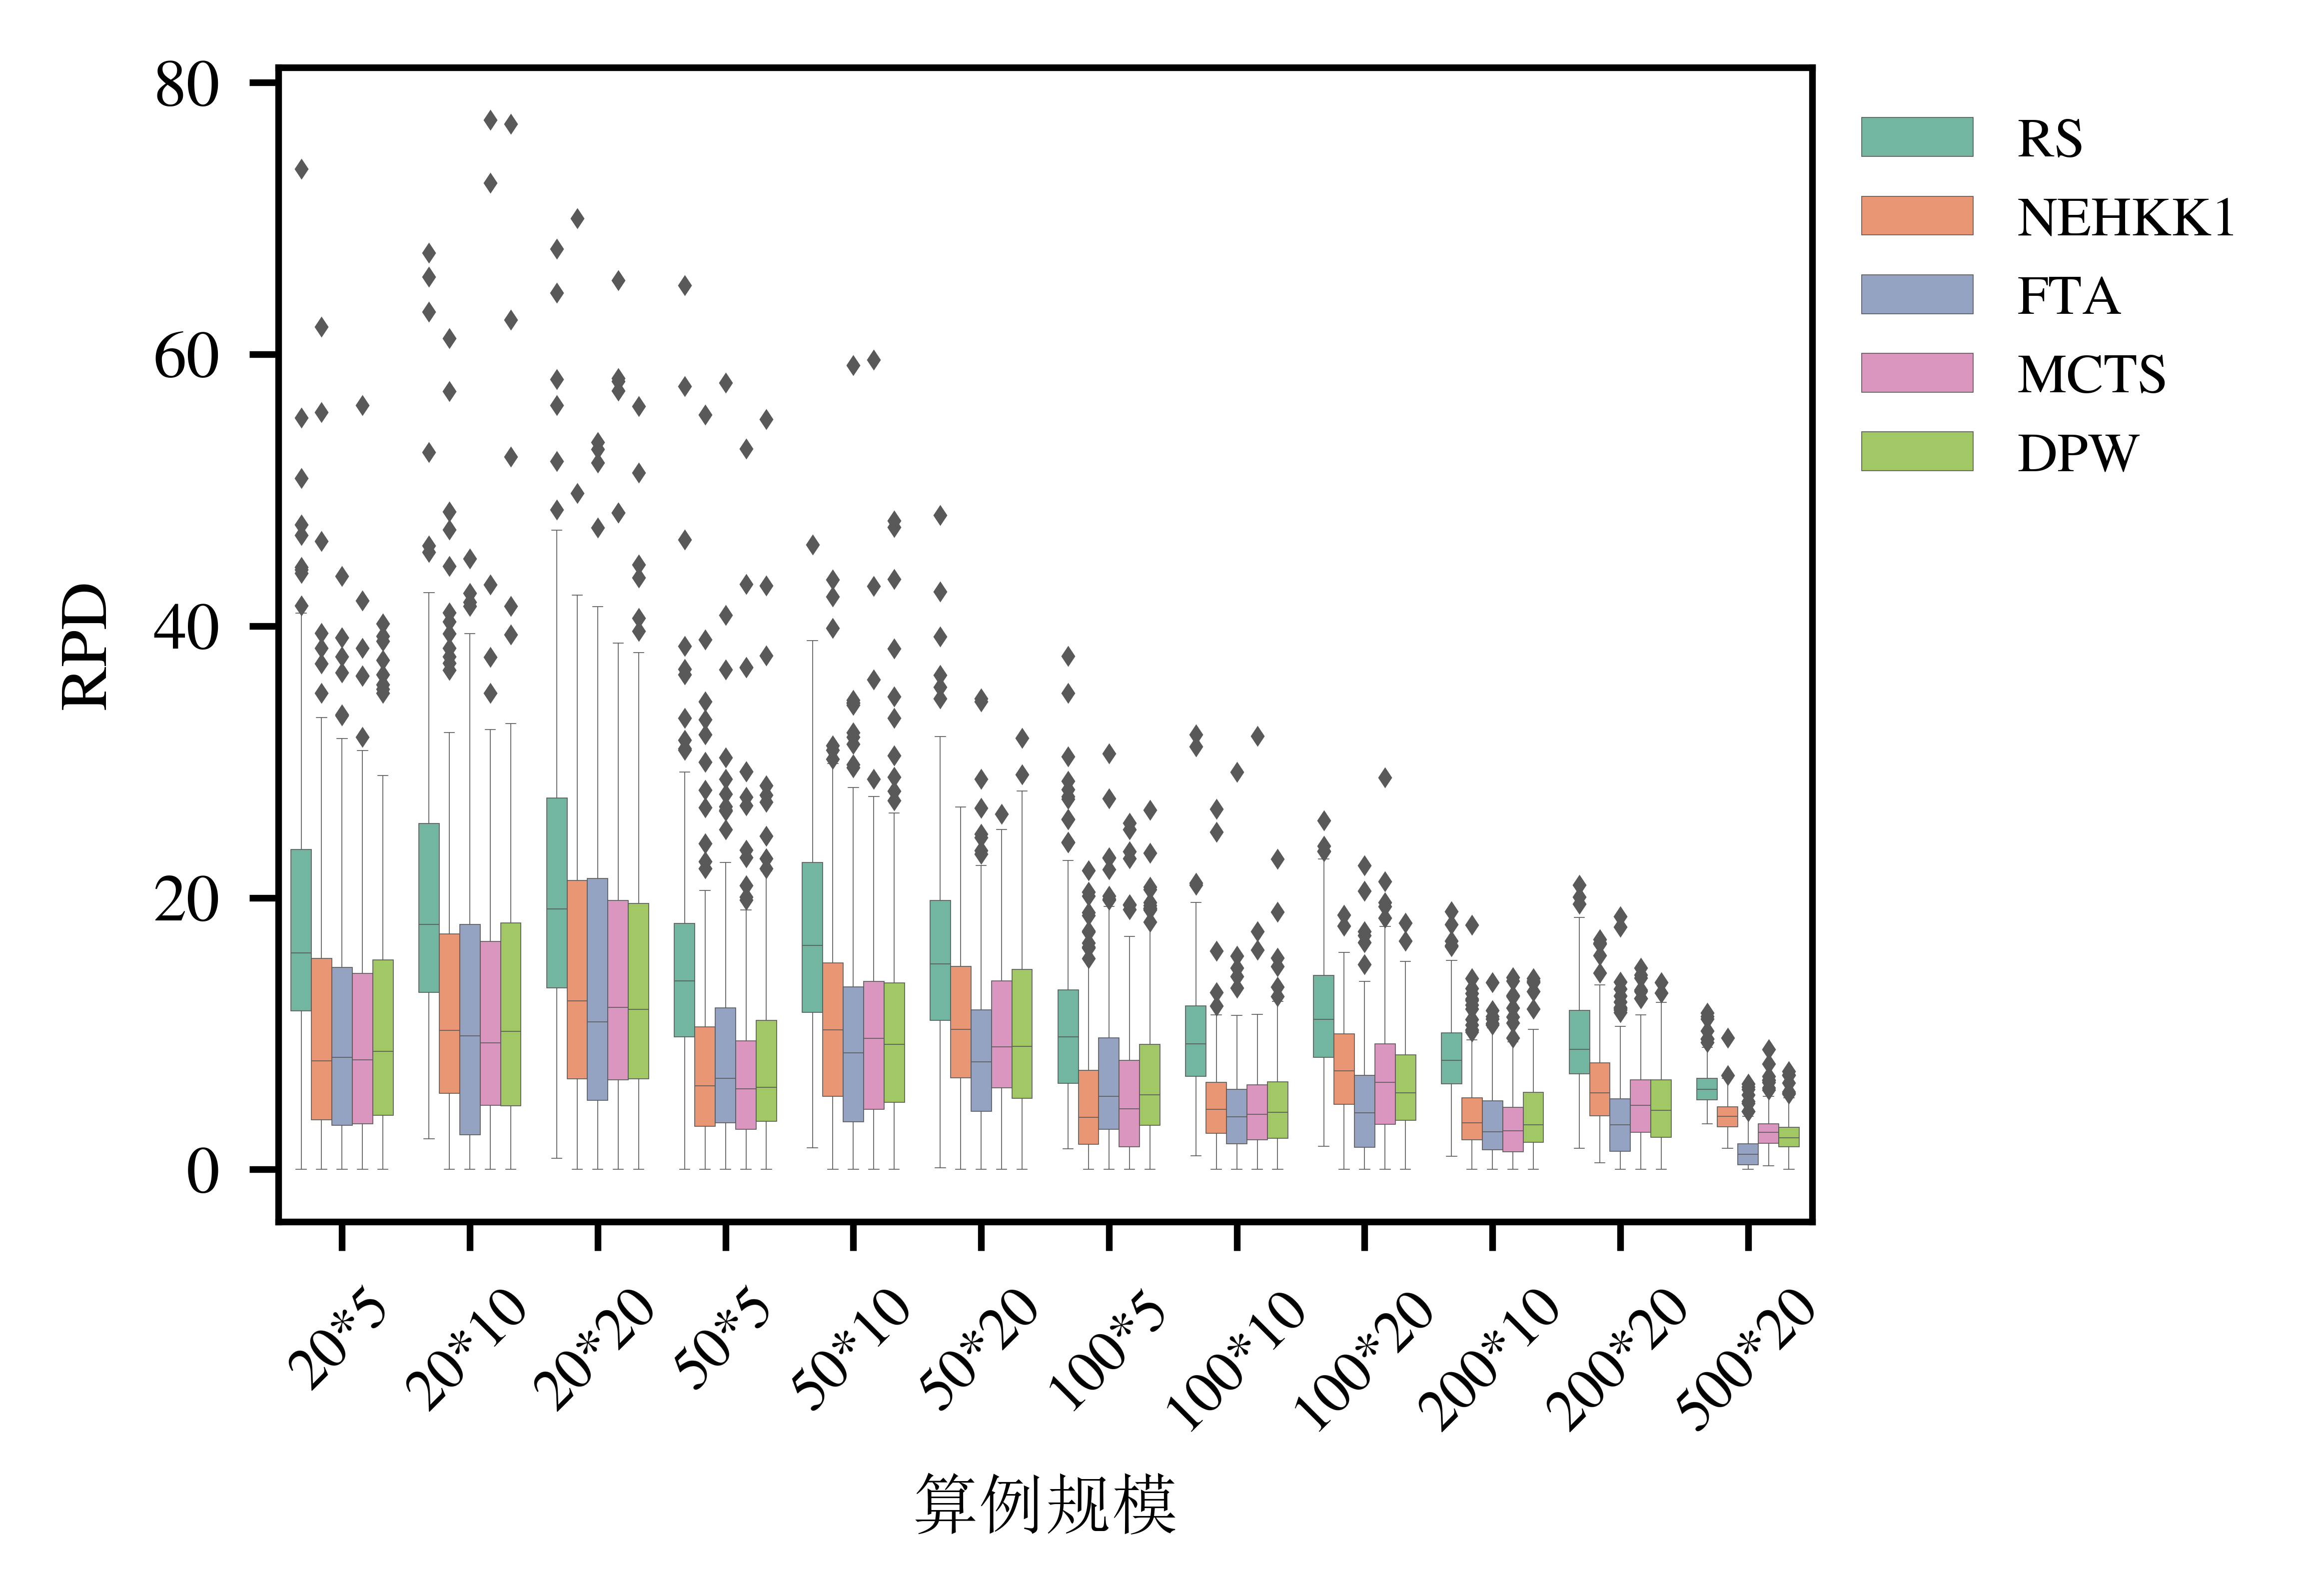

In [42]:
with plt.style.context(['ieee']):
    plt.rcParams['figure.dpi'] = 1200.0
    plt.figure()
    # f = sns.boxplot(x = 'methods', y = 'RPD', data=rpd_heu_noig, order=True palette='Set2', linewidth=0.1, fliersize=0.5, flierprops={'marker': 'd'})
    f = sns.boxplot(x = 'sizes', y = 'RPD', hue='methods', data=rpd_75, palette='Set2', linewidth=0.1, fliersize=0.5, flierprops={'marker': 'd'})
    # f = sns.lineplot(x = 'sizes', y = 'ARPD', hue='methods', data=arpd_ig_analyse_sz, palette='Set2', linewidth=0.5, markers='o')
    f.legend(frameon = False, fontsize='small', loc=2, bbox_to_anchor=(1,1))

    plt.xlabel("算例规模", fontname='simsun')
    plt.xticks(rotation=45, fontsize=7)
    plt.savefig(current_dir+"/results/analysis/box75.svg", dpi=1200, format='svg', bbox_inches = 'tight')
    plt.show()

In [43]:
rpd_compare_excel(rpd_75, ['MCTS','DPW'], rpd_75['methods'].unique().tolist(), sizes, current_dir+'results/analysis/rpd75.xlsx')

0